In [1]:
%pip install tensorflow     

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os

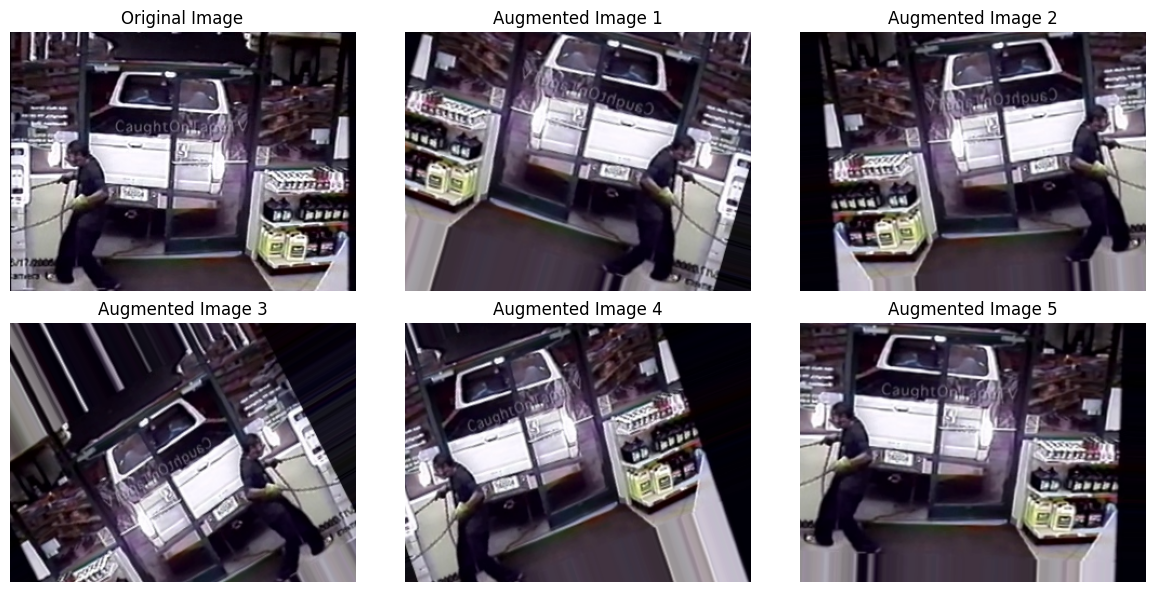

In [14]:
data_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an example image
image_path = r'C:\Users\swadh\OneDrive\Desktop\crimedetection\Frames_for_Crime\Burglary\Burglary007_x264_fr0.jpg'
image = load_img(image_path, target_size=(240, 320))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(image_array[0].astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

aug_iter = data_generator.flow(image_array, batch_size=1)

# Display augmented images
for i in range(5):
    augmented_images = next(aug_iter)
    plt.subplot(2, 3, i + 2)
    plt.imshow(augmented_images[0].astype(np.uint8))
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [26]:
BATCH_SIZE_TRAINING = 32
IMAGE_RESIZE = (240, 320)

# Define the training data generator
train_data_generator = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255
)

# Create the training data generator
train_generator = train_data_generator.flow_from_directory(
    r'C:\Users\swadh\OneDrive\Desktop\crimedetection',
    target_size=IMAGE_RESIZE,
    batch_size=BATCH_SIZE_TRAINING,
    class_mode='binary',
    classes=['Frames_for_Crime', 'Frames_for_Normal']
)

print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.')


Found 2230 images belonging to 2 classes.
Found 2230 images belonging to 2 classes.


In [27]:
print(f'train_gen.class_indices: {train_generator.class_indices}')

train_gen.class_indices: {'Frames_for_Crime': 0, 'Frames_for_Normal': 1}


In [28]:
from tensorflow.keras.layers import BatchNormalization

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(240, 320, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [30]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Early stopping callback
cb_early_stopper = EarlyStopping(monitor='loss', patience=4)

In [32]:
NUM_EPOCHS = 20
STEPS_PER_EPOCH_TRAINING = train_generator.samples // BATCH_SIZE_TRAINING

# Train the model
fit_history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
    epochs=NUM_EPOCHS,
    callbacks=[cb_early_stopper]
)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6043 - loss: 0.6619
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - accuracy: 0.7812 - loss: 0.4846
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7450 - loss: 0.5293
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.6250 - loss: 0.6487  
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7589 - loss: 0.4794
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.8125 - loss: 0.4755  
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8082 - loss: 0.4222
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.8750 - loss: 0.3371  
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8605 - loss: 0.3292
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 54us/step - accuracy: 0.7188 - loss: 0.4982
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8231 - loss: 0.3831
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step - accuracy:

In [33]:
print(fit_history.history.keys())

dict_keys(['accuracy', 'loss'])


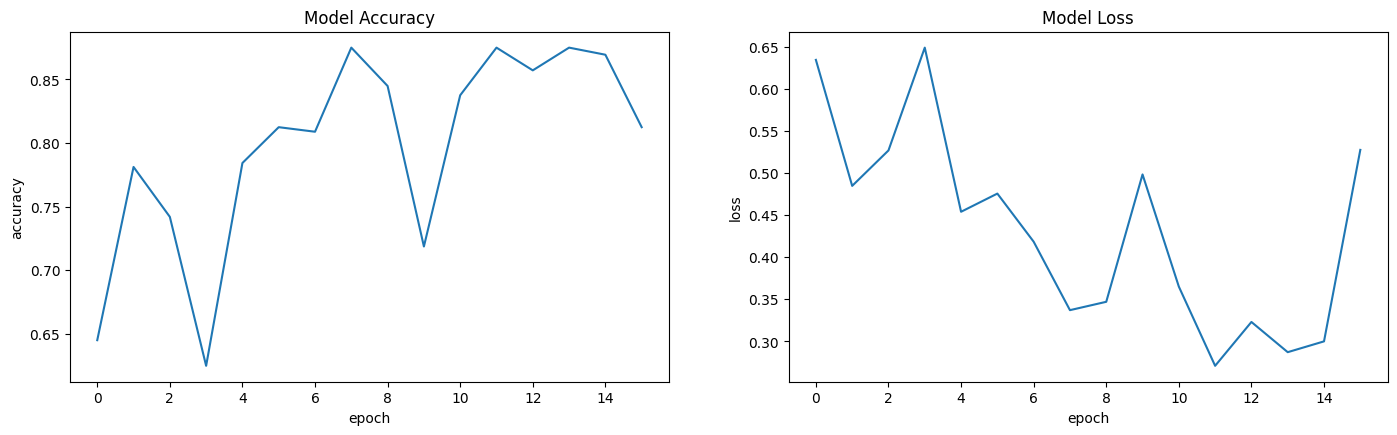

In [34]:
plt.figure(1, figsize=(17, 10))

plt.subplot(221)
plt.plot(fit_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(222)
plt.plot(fit_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()


In [35]:
# Define the test data generator
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

# Create a generator for the test data
test_generator = test_data_generator.flow_from_directory(
    r'C:\Users\swadh\OneDrive\Desktop\crimedetection',
    target_size=IMAGE_RESIZE,
    batch_size=BATCH_SIZE_TRAINING,
    class_mode='binary',
    classes=['test_crime', 'test_normal']
)

# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

Found 556 images belonging to 2 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.9011 - loss: 0.2191
Test Loss: 0.24591591954231262, Test Accuracy: 0.8902877569198608


In [36]:
model.save('C:/Users/swadh/OneDrive/Desktop/crimedetection/self.h5')